In [1]:
import pickle
from scipy.sparse import csr_matrix
#from clustering import visualize_silhouette_clusters, compare_true_labels
import numpy as np
from kmodes.kmodes import KModes
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_distances
from soyclustering import SphericalKMeans, visualize_pairwise_distance
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_20newsgroups


raw_posts = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))

with open('data/imdb/minsupp_0.05/itemset_features.pkl', 'rb') as f:
    itemset_features = pickle.load(f)
    
with open('data/imdb_labels.pkl', 'rb') as f:
    true_labels = pickle.load(f)
    
print("num of groundtruth labels:", len(np.unique(true_labels)))

num of groundtruth labels: 2


In [18]:
# adjust number of clusters
my_num_clusters = 2

# convert itemset_features to a sparse matrix that SphericalKMeans will accept
itemset_matrix = csr_matrix(itemset_features.astype(int))
density = itemset_matrix.getnnz() / np.prod(itemset_matrix.shape)
print("density of matrix:", density)

spherical_kmeans = SphericalKMeans(
        n_clusters=my_num_clusters,
        max_iter=100,
        verbose=1,
        init='similar_cut',
        #sparsity='minimum_df',
        minimum_df_factor=0.05
    )

sphkmeans_cluster_labels = spherical_kmeans.fit_predict(itemset_matrix)
print('finished spherical clustering')

compare_true_labels(true_labels, sphkmeans_cluster_labels, itemset_features)

density of matrix: 0.30926933333333334
initialization_time=0.001515 sec, sparsity=0.133
n_iter=1, changed=2368, inertia=18732.663, iter_time=0.050 sec, sparsity=0.933
n_iter=2, changed=1549, inertia=10539.855, iter_time=0.050 sec, sparsity=1.0
n_iter=3, changed=1334, inertia=10418.544, iter_time=0.048 sec, sparsity=1.0
n_iter=4, changed=947, inertia=10341.191, iter_time=0.050 sec, sparsity=1.0
n_iter=5, changed=207, inertia=10307.681, iter_time=0.049 sec, sparsity=0.967
n_iter=6, changed=0, inertia=10304.566, iter_time=0.049 sec, sparsity=0.967
Early converged.
finished spherical clustering
Adjusted Rand Index: 0.0006372464402806565
Normalized Mutual Information: 0.0006946144364273162
Homogeneity: 0.0006323463120460893
Completeness: 0.000770485324071029
V-Measure: 0.0006946144364273162
Silhouette Score: 0.06783042565156397


In [19]:
# KModes clustering

km = KModes(n_clusters=my_num_clusters, init='Huang', n_init=5, verbose=1, n_jobs=-1)
kmodes_cluster_labels = km.fit_predict(itemset_features)

compare_true_labels(true_labels, kmodes_cluster_labels, itemset_features)


Best run was number 1
Adjusted Rand Index: 0.0007353874031278182
Normalized Mutual Information: 0.0005648097026422096
Homogeneity: 0.0005633096039170984
Completeness: 0.0005663178122541579
V-Measure: 0.0005648097026422096
Silhouette Score: 0.12133810631706274


C:\Users\zhiyi\.conda\envs\SC4020\Lib\site-packages\joblib\_memmapping_reducer.py:611: UserWarning: Failed to delete temporary folder: C:\Users\zhiyi\AppData\Local\Temp\joblib_memmapping_folder_21660_8b59de26117f4652b7bc3f771b061f24_ac977a85062344329467eded6ff340d8
  warnings.warn("Failed to delete temporary folder: {}"
C:\Users\zhiyi\.conda\envs\SC4020\Lib\site-packages\joblib\_memmapping_reducer.py:611: UserWarning: Failed to delete temporary folder: C:\Users\zhiyi\AppData\Local\Temp\joblib_memmapping_folder_21660_cbed37b89d5e4c829906b8a0ace5e8dd_2628b4f292b6418c930d3d7129757812
  warnings.warn("Failed to delete temporary folder: {}"
C:\Users\zhiyi\.conda\envs\SC4020\Lib\site-packages\joblib\_memmapping_reducer.py:611: UserWarning: Failed to delete temporary folder: C:\Users\zhiyi\AppData\Local\Temp\joblib_memmapping_folder_21660_46986421e9134613ad48ad7d0e542445_c7165e8800cf4a81865a2f953ccd344a
  warnings.warn("Failed to delete temporary folder: {}"


In [9]:
# Agglomerative clustering

distances = cosine_distances(itemset_features)

agglo_clustering = AgglomerativeClustering(n_clusters=my_num_clusters, metric="precomputed", linkage="average")
agglo_labels = agglo_clustering.fit_predict(distances)

compare_true_labels(true_labels, agglo_labels, itemset_features)



Adjusted Rand Index: -2.5594880614096938e-08
Normalized Mutual Information: 1.1590243576531128e-05
Homogeneity: 5.811035497683339e-06
Completeness: 0.002116141343349849
V-Measure: 1.1590243576531128e-05
Silhouette Score: 0.13013545142936433


In [ ]:
## RANDOM VISUALIZATION STUFF BELOW

For n_clusters = 2 The average silhouette_score is : 0.06654466924279381


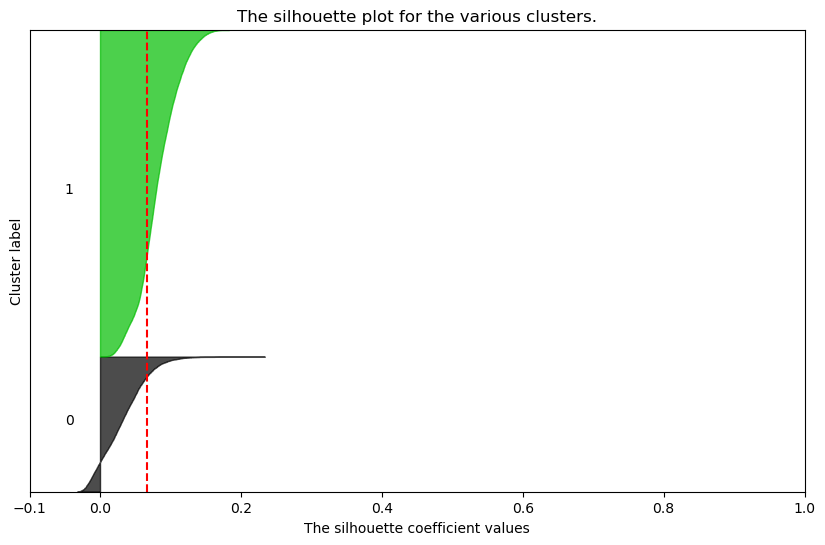

In [7]:
## Silhouette plot to visualize how good clusters are: if they are good, should see more on the right side
## Good average silhouette score apparently should be >0.5?

# Subsample before trying to do silhouette visualization, IF dataset is too big
visualize_silhouette_clusters(sphkmeans_cluster_labels, itemset_features, metric='cosine')

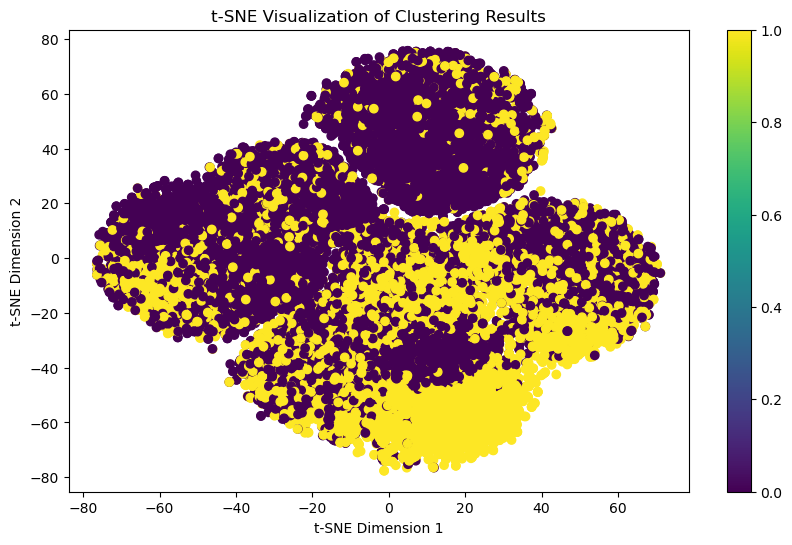

In [11]:
## using t-sne (alternative to pca) to visualize SPHKMEANS LABELS

# Calculate cosine distances between binary vectors
cosine_distances_matrix = cosine_distances(itemset_features)

# Create a t-SNE instance with cosine distance
tsne = TSNE(n_components=2, metric="precomputed", perplexity=30, learning_rate=200, init="random")

# Fit t-SNE to the cosine distance matrix
tsne_results = tsne.fit_transform(cosine_distances_matrix)

# Create a scatter plot to visualize the results
plt.figure(figsize=(10, 6))


plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=kmodes_cluster_labels, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Clustering Results')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


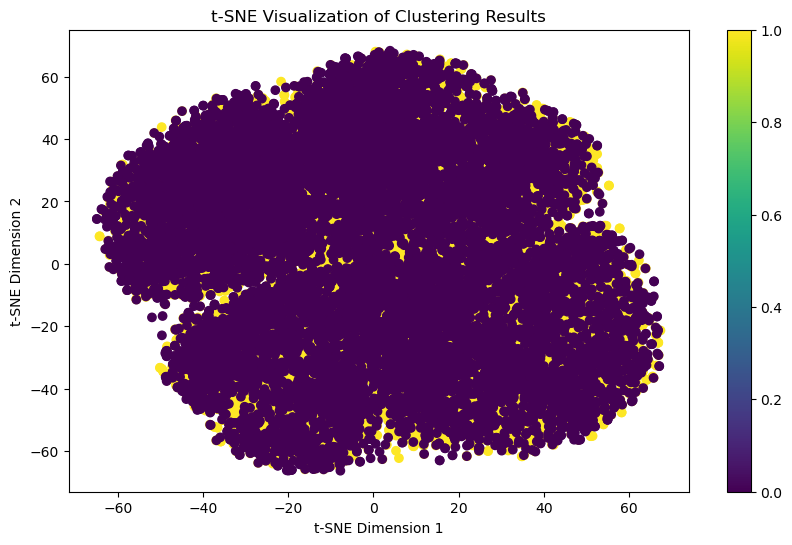

In [6]:
## using t-sne (alternative to pca) to visualize TRUE LABELS

# Calculate cosine distances between binary vectors
cosine_distances_matrix = cosine_distances(itemset_features)

# Create a t-SNE instance with cosine distance
tsne = TSNE(n_components=2, metric="precomputed", perplexity=30, learning_rate=200, init="random")

# Fit t-SNE to the cosine distance matrix
tsne_results = tsne.fit_transform(cosine_distances_matrix)

# Create a scatter plot to visualize the results
plt.figure(figsize=(10, 6))


plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=true_labels, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Clustering Results')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


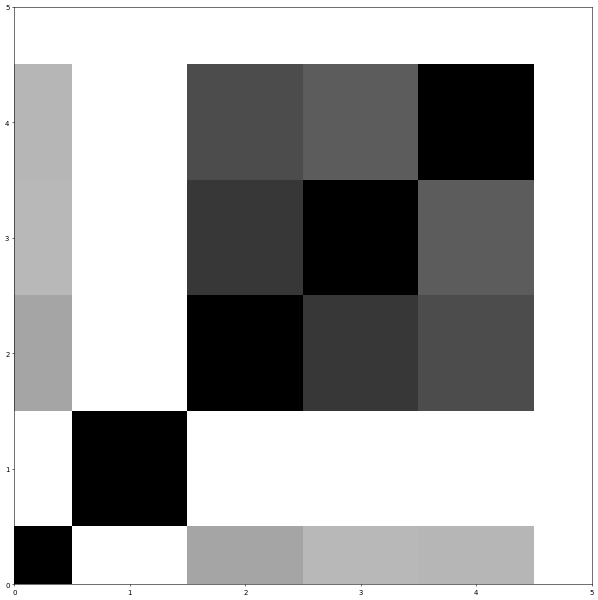

In [17]:
# function included with the sphericalkmeans library to evaluate the distance between the clusters
# dark means closer, light means further away - think ideally should have more light squares?

sphkmeans_centers = spherical_kmeans.cluster_centers_

fig = visualize_pairwise_distance(centers=sphkmeans_centers,
                                  labels=sphkmeans_cluster_labels, 
                                  max_dist=1, 
                                  sort=False)

In [2]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets (e.g., 60%, 20%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(itemset_features, true_labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build a simple neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(itemset_features.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Use 'softmax' if you have more than two classes
])

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5259 - accuracy: 0.7428 - val_loss: 0.4600 - val_accuracy: 0.7840
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4404 - accuracy: 0.7961 - val_loss: 0.4649 - val_accuracy: 0.7780
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3945 - accuracy: 0.8207 - val_loss: 0.4801 - val_accuracy: 0.7706
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3349 - accuracy: 0.8546 - val_loss: 0.5135 - val_accuracy: 0.7598
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2605 - accuracy: 0.8956 - val_loss: 0.5726 - val_accuracy: 0.7594
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1815 - accuracy: 0.9315 - val_loss: 0.6788 - val_accuracy: 0.7418
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1169 - accuracy: 0.9617 - val_loss: 0.8558 - val_accuracy: 0.7384
Epoch 

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
predictions = model.predict(X_test)

# Convert predictions to label
if predictions.shape[1] > 1:
    # Multi-class classification
    predicted_test_labels = np.argmax(predictions, axis=1)
else:
    # Binary classification
    predicted_test_labels = (predictions > 0.5).astype("int32").flatten()

# Get true labels (ensure they are in the correct format)
true_test_labels = y_test

# Calculate additional metrics
# print("Classification Report:\n", classification_report(true_labels, predicted_labels))
# print("Confusion Matrix:\n", confusion_matrix(true_labels, predicted_labels))

1005